**Segmentação por cores**

Utiliza-se um filtro baseado na cor da imagem.

Cores mais claras possuem valores maiores, mais próximos de 255.

**Espaço de cor HSV**

Está mais relacionado ao sistema visual humano. Por exemplo, em impressões.

A cor no HSV é descrita utilizando a matiz, saturação e valor. 

- Hue - matiz: cor pura, sem a adição de preto ou branco;
- Saturation - saturação: pureza, intensidade da cor, quanto menor o valor mais para o tom de cinza a cor será;
- Value - valor: brilho, capacidade da cor de refletir a cor branco. Quanto menor o valor mais escura será a cor.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/gdrive')

!cp -R /content/gdrive/MyDrive/Mestrado/Cursos\ -\ Udemy/Segmentação\ de\ imagens/Segmentação\ Imagens\ Python\ AZ/imagens imagens/ 

Mounted at /content/gdrive


In [5]:
def mostrar_imagem(imagem):
  fig = plt.gcf() # Limpa as configurações do gráfico
  fig.set_size_inches(18, 6)
  plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB), cmap='gray')
  plt.axis('off')
  plt.show()

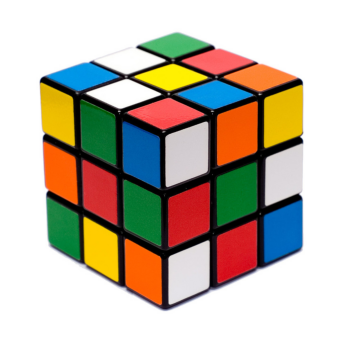

In [6]:
img = cv2.imread('/content/imagens/cubo_magico.jpg')
mostrar_imagem(img)

**Segmentação no espaço RGB**

In [7]:
# Segmentação com o sistema RGB
cor_min = (90,10,0) # BGR
cor_max = (255,180,40) # BGR

In [8]:
maximo = np.array(cor_min, dtype='uint8')
minimo = np.array(cor_max, dtype='uint8')

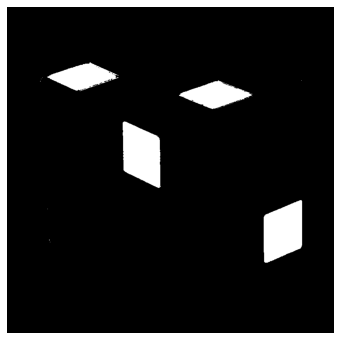

In [12]:
# Detecção das cores
mascara = cv2.inRange(img, cor_min, cor_max) # Recebe a imagem e os intervalos de cor e realiza a segmentação
mostrar_imagem(mascara)

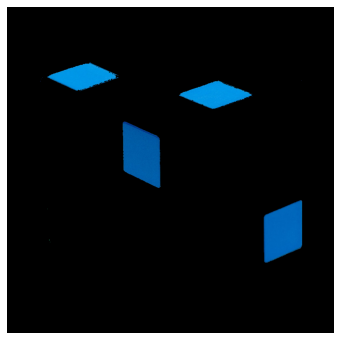

In [14]:
segmento_cor = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(segmento_cor)

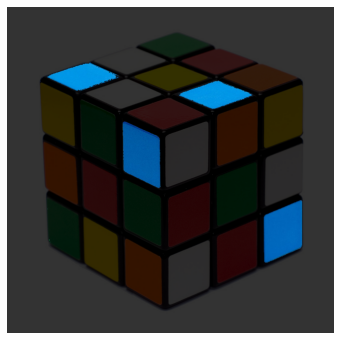

In [16]:
seg_sobreposicao = cv2.addWeighted(segmento_cor, 0.8, img, 0.2, 0)
mostrar_imagem(seg_sobreposicao)

In [17]:
# Segmentando várias cores
cores = [
         ([90,10,0], [255,180,40]),   # Azul
         ([0,80,0], [120,255,120]),   # Verde
         ([8,8,160], [120,120,255]),  # Vermelho
         ([0,150,200], [10,255,255]), # Amarelo
         ([0,80,240], [80,165,255])   # Laranja
]

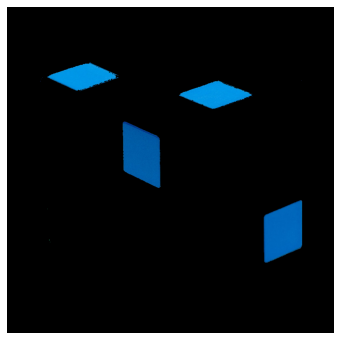

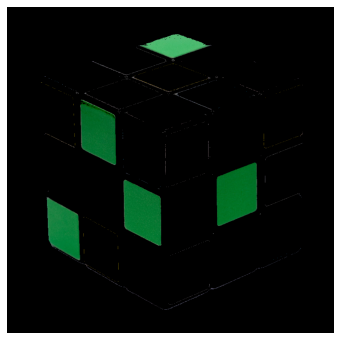

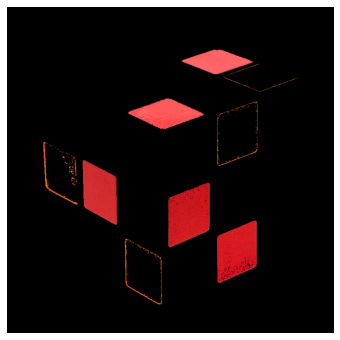

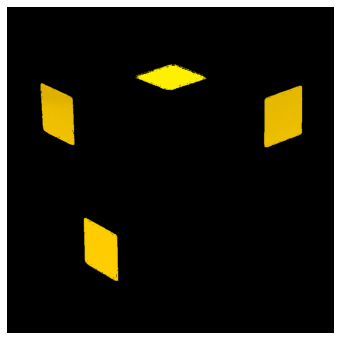

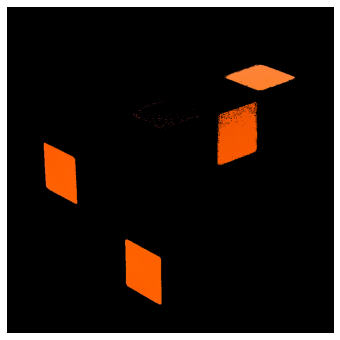

In [18]:
for (minimo, maximo) in cores:
  minimo = np.array(minimo, dtype = 'uint8')
  maximo = np.array(maximo, dtype = 'uint8')

  mascara = cv2.inRange(img, minimo, maximo)
  segmento = cv2.bitwise_and(img, img, mask = mascara)
  mostrar_imagem(segmento)

**Segmentação no espaço HSV**

In [19]:
img = cv2.imread('/content/imagens/cubo_magico.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

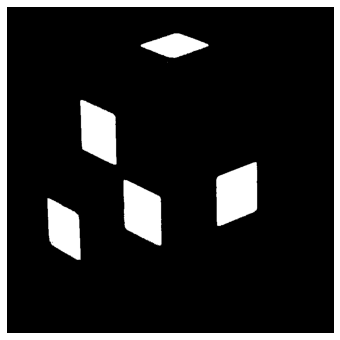

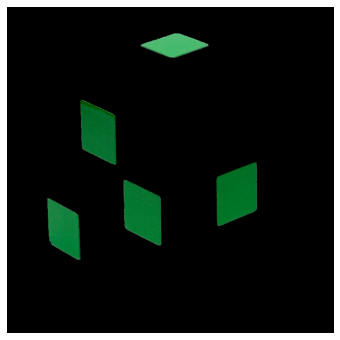

In [20]:
minimo = (45, 80, 40)   # Matiz, saturação e valor
maximo = (75, 255, 255)
mascara = cv2.inRange(img_hsv, minimo, maximo)
mostrar_imagem(mascara)
segmento = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(segmento)

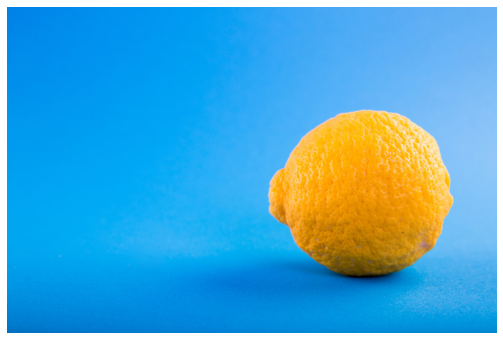

In [22]:
img = cv2.imread('/content/imagens/limao_amarelo.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
mostrar_imagem(img)

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [33]:
# Normalizando os pixels entre 0 e 1, em ambos os sistemas de cores
cores_pixels = img.reshape((np.shape(img)[0] * np.shape(img)[1], 3))
cores_pixels.shape

(426400, 3)

In [34]:
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(cores_pixels)
cores_pixels = norm(cores_pixels).tolist()

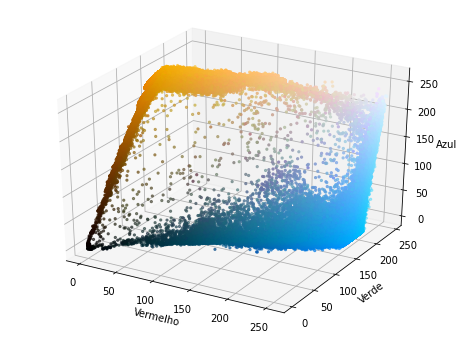

In [35]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r, g, b = cv2.split(rgb)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors = cores_pixels, marker = '.')
axis.set_xlabel('Vermelho')
axis.set_ylabel('Verde')
axis.set_zlabel('Azul');

Os valores RGB das cores invadem o espaço uma das outras gerando falhas na segmentação

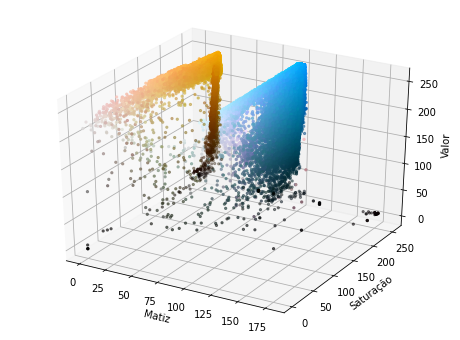

In [36]:
h, s, v = cv2.split(img_hsv)
fig = plt.figure()
fig.set_size_inches(8,6)
axis = fig.add_subplot(1,1,1,projection='3d')
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = cores_pixels, marker = '.')
axis.set_xlabel('Matiz')
axis.set_ylabel('Saturação')
axis.set_zlabel('Valor');

No espaço de cor HSV as cores estão separadas facilitando a separação entre as cores

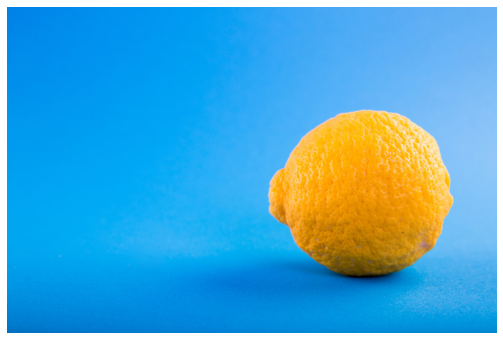

In [51]:
img = cv2.imread('/content/imagens/limao_amarelo.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mostrar_imagem(img)

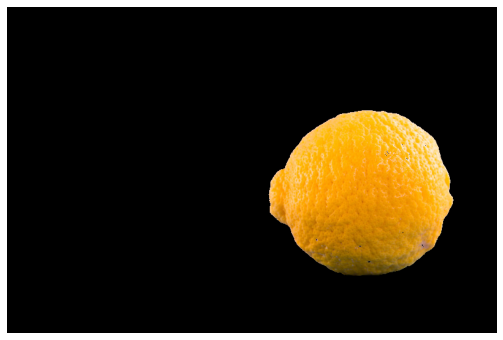

In [53]:
minimo = (0, 20, 20)
maximo = (30, 255, 255)
minimo = np.array(minimo, dtype = 'uint8')
maximo = np.array(maximo, dtype = 'uint8')

mascara = cv2.inRange(img_hsv, minimo, maximo)
segmento = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(segmento)

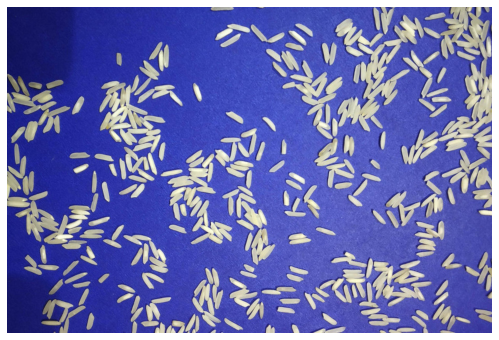

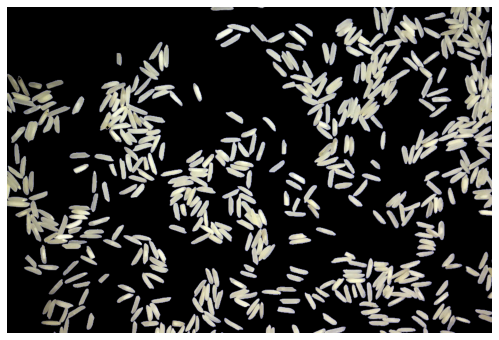

In [54]:
img = cv2.imread('/content/imagens/graos_arroz.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mostrar_imagem(img)

minimo = (0, 0, 0)
maximo = (180, 100, 255)
minimo = np.array(minimo, dtype = 'uint8')
maximo = np.array(maximo, dtype = 'uint8')

mascara = cv2.inRange(img_hsv, minimo, maximo)
segmento = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(segmento)

**Efeito Crhoma-key**

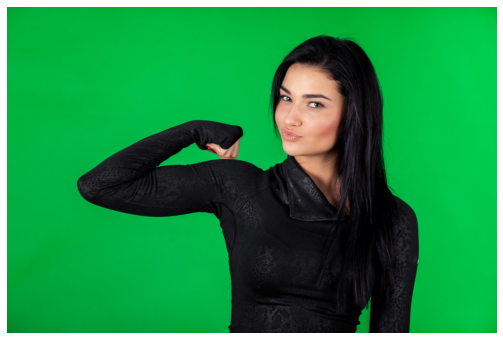

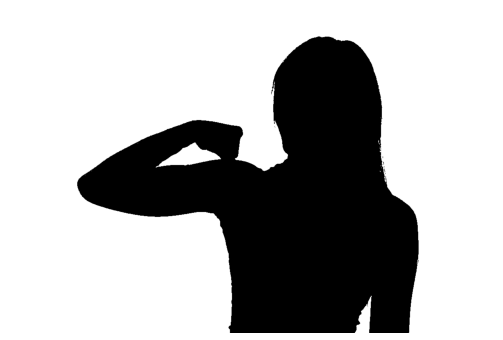

In [57]:
img = cv2.imread('/content/imagens/chromakey.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mostrar_imagem(img)

minimo = (40, 80, 40)
maximo = (80, 255, 255)
minimo = np.array(minimo, dtype = 'uint8')
maximo = np.array(maximo, dtype = 'uint8')

mascara = cv2.inRange(img_hsv, minimo, maximo)
mostrar_imagem(mascara)

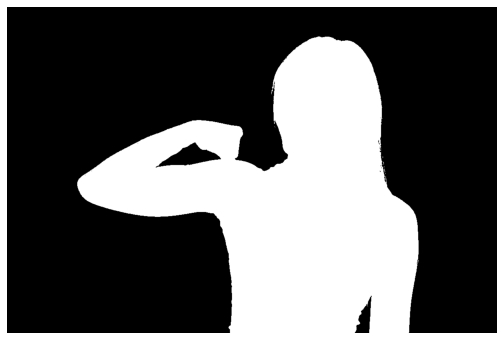

In [58]:
mascara = 255 - mascara
mostrar_imagem(mascara)

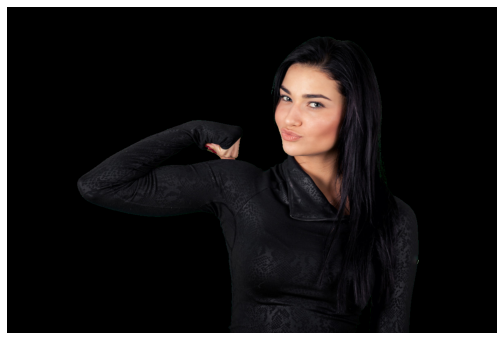

In [60]:
segmento = cv2.bitwise_and(img, img, mask = mascara)
mostrar_imagem(segmento)

In [61]:
altura, largura = img.shape[:2]

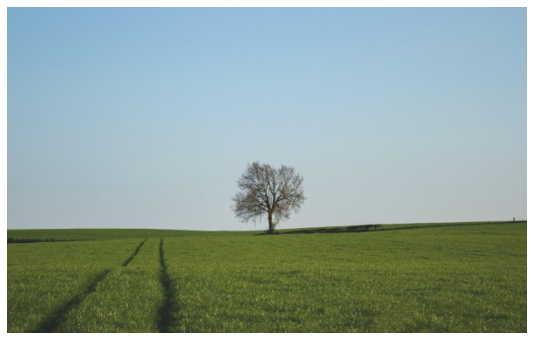

In [62]:
img_final = img.copy()
fundo = cv2.imread('/content/imagens/paisagem01.jpg')
mostrar_imagem(fundo)

In [63]:
fundo = cv2.resize(fundo, (largura, altura))

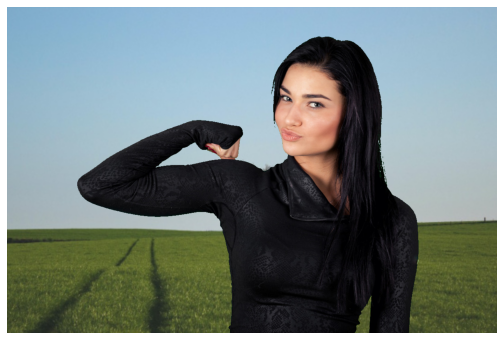

In [65]:
img_final[mascara == 0] = fundo[mascara == 0]
mostrar_imagem(img_final)

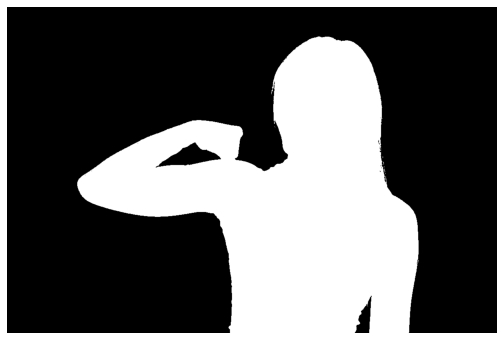

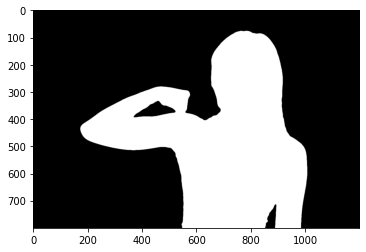

In [68]:
# Suavizando os contornos
import skimage.exposure
mascara_suave = mascara.copy()
mascara_suave = cv2.GaussianBlur(mascara_suave, (0,0), sigmaX = 3, sigmaY = 3, borderType = cv2.BORDER_DEFAULT)
mascara_suave = skimage.exposure.rescale_intensity(mascara_suave, in_range = (150, 190), out_range = (0,255))
mostrar_imagem(mascara)
plt.imshow(mascara_suave, cmap = 'gray');

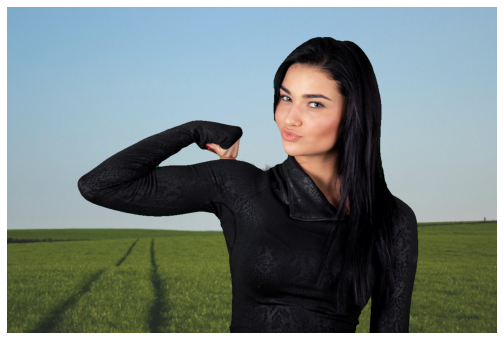

In [69]:
img_final = img.copy()
img_final[mascara_suave == 0] = fundo[mascara_suave == 0]
mostrar_imagem(img_final)

In [74]:
def segemtacao_cores(img, cor_min, cor_max, canalCor = 0):
  img_processamento = img.copy()
  if canalCor == 1: # HSV
    img_processamento = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  
  mascara = cv2.inRange(img_processamento, np.array(cor_min, dtype = 'uint8'), np.array(cor_max, dtype = 'uint8'))
  return cv2.bitwise_and(img, img, mask = mascara)

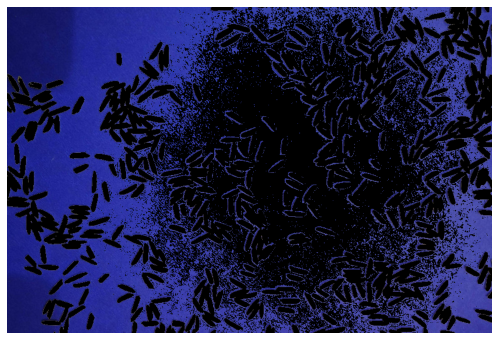

In [75]:
ret = segemtacao_cores(cv2.imread('/content/imagens/graos_arroz.jpg'), [0, 0, 0], [180, 100, 255])
mostrar_imagem(ret)

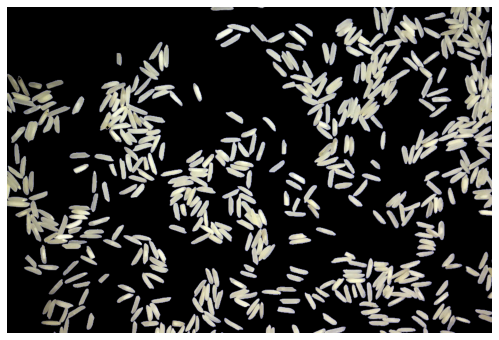

In [76]:
ret = segemtacao_cores(cv2.imread('/content/imagens/graos_arroz.jpg'), [0, 0, 0], [180, 100, 255], 1)
mostrar_imagem(ret)